# **06. Basic Computer Vision**

**Topic**: Using CNN in computer vision, and visualize the feature maps

In [1]:
from keras import layers
from keras import models
from keras import optimizers
from keras.datasets import mnist
from keras.utils import to_categorical

Using TensorFlow backend.


## **初嘗 CNN**

### **Build a basic CNN**

In [2]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [3]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

### **Load Data (MNIST)**

In [4]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32')/255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [5]:
print("Train images : ",train_images.shape)
print("Train labels : ",train_labels.shape)
print("Test images : ",test_images.shape)
print("Test labels : ",test_labels.shape)

Train images :  (60000, 28, 28, 1)
Train labels :  (60000, 10)
Test images :  (10000, 28, 28, 1)
Test labels :  (10000, 10)


In [6]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/5
60000/60000 [==============================] - 14s 240us/step - loss: 0.1700 - acc: 0.9468
Epoch 2/5
60000/60000 [==============================] - 11s 177us/step - loss: 0.0460 - acc: 0.9858
Epoch 3/5
60000/60000 [==============================] - 11s 181us/step - loss: 0.0314 - acc: 0.9903
Epoch 4/5
60000/60000 [==============================] - 11s 181us/step - loss: 0.0244 - acc: 0.9927
Epoch 5/5
60000/60000 [==============================] - 10s 175us/step - loss: 0.0184 - acc: 0.9942


In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

10000/10000 [==============================] - 1s 109us/step


0.9913

**Difference between Convolutional Layer and Fully connected Layer**
* Fully connected Layer 是學習全域的特徵，每個小pixel都是參考點
* Convolutional Layer 則是學習局部的特徵，將一個小區域作為特徵點

**Advantages of Convolutional Layer**
* Translation invariant: 例如今天我們可以把右下角學習到的特徵，應用在圖片左上角上面，這符合我們現實生活特徵可以平移的特點
* Spatial hierarchies of patterns: CNN 通常將原本又寬又薄的 input，變得又小又深，就像是我們看東西會從輪廓看到細節，具有層次的結構

## **以少量資料來訓練 CNN**

有 3 種方法可以幫忙處理
* data augmentation (資料擴充法)
* feature extration with a pretrained network (使用 pretrained model 來幫助 feature extration)
* fine-tuning a pretrained model (使用預先訓練的 model)

### Prepaer Dataset

這邊使用 kaggle 的 dataset, 辨別 貓 和 狗 的圖片,</br>
網址: https://www.kaggle.com/c/dogs-vs-cats/data</br>
我們先把它切成小的 dataset

In [10]:
import os, shutil

original_dataset_dir = os.path.join(os.getcwd(),'rawdata', 'train') # 原本檔案的路徑
base_dir = os.path.join(os.getcwd(), 'dataset') # 想解壓縮檔案的路徑

#----------------------------------------------------------------------------
# 如果 base dir 不存在, 那麼建立資料夾
#----------------------------------------------------------------------------
if not os.path.exists(base_dir): os.mkdir(base_dir)

#----------------------------------------------------------------------------
# 將 data 分散成 train, test 及 validation 的資料夾
#----------------------------------------------------------------------------
train_dir = os.path.join(base_dir, 'train')
if not os.path.exists(train_dir): os.mkdir(train_dir)
    
test_dir = os.path.join(base_dir, 'test')
if not os.path.exists(test_dir): os.mkdir(test_dir)
    
val_dir = os.path.join(base_dir, 'val')
if not os.path.exists(val_dir): os.mkdir(val_dir)
    
#----------------------------------------------------------------------------
# 在 train, test 及 validation 下個創立 cat 及 dog 資料夾
#----------------------------------------------------------------------------
train_cat_dir = os.path.join(train_dir, 'cats')
if not os.path.exists(train_cat_dir): os.mkdir(train_cat_dir)
    
train_dog_dir = os.path.join(train_dir, 'dogs')
if not os.path.exists(train_dog_dir): os.mkdir(train_dog_dir)
    
test_cat_dir = os.path.join(test_dir, 'cats')
if not os.path.exists(test_cat_dir): os.mkdir(test_cat_dir)
    
test_dog_dir = os.path.join(test_dir, 'dogs')
if not os.path.exists(test_dog_dir): os.mkdir(test_dog_dir)
    
val_cat_dir = os.path.join(val_dir, 'cats')
if not os.path.exists(val_cat_dir): os.mkdir(val_cat_dir)
    
val_dog_dir = os.path.join(val_dir, 'dogs')
if not os.path.exists(val_dog_dir): os.mkdir(val_dog_dir)

#----------------------------------------------------------------------------
# 把 img 分別依 train, test, val 複製到 cat 及 dog 的資料夾中
#----------------------------------------------------------------------------
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)] #-----cat---train:1000
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cat_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]#---cat--test:500
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cat_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]#---cat---val:500
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(val_cat_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)] #-----dog---train:1000
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dog_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]#---dog--test:500
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dog_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]#---dog---val:500
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(val_dog_dir, fname)
    shutil.copyfile(src, dst)

In [11]:
print('Train dog dataset : {}'.format(len(os.listdir(train_dog_dir))))
print('Train cat dataset : {}'.format(len(os.listdir(train_cat_dir))))
print('Test dog dataset : {}'.format(len(os.listdir(test_dog_dir))))
print('Test cat dataset : {}'.format(len(os.listdir(test_cat_dir))))
print('Val dog dataset : {}'.format(len(os.listdir(val_dog_dir))))
print('Val cat dataset : {}'.format(len(os.listdir(val_cat_dir))))

Train dog dataset : 1000
Train cat dataset : 1000
Test dog dataset : 500
Test cat dataset : 500
Val dog dataset : 500
Val cat dataset : 500


### Build Neuro Net Work

In [12]:
model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [14]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

### Data preprocessing by keras

使用 keras 的 ImageDataGenerator 可以幫助我們做一些前處理, 並自動將影像檔轉換成批次的 tensor, 好放到我們的 model 中

In [15]:
from keras.preprocessing.image import ImageDataGenerator

#-------------------
# Rescale the Image
#-------------------
train_data_gen = ImageDataGenerator(rescale=1/255)
test_data_gen = ImageDataGenerator(rescale=1/255)

#------------------------------------
# Build the training data generator
#------------------------------------
train_generator = train_data_gen.flow_from_directory(
    train_dir,
    target_size=(150, 150),                              
    batch_size=20,
    class_mode='binary')

#-------------------------------------
# Build the validation data generator
#-------------------------------------
validation_generator = test_data_gen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [16]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [17]:
# Using Image generator to fit the model
history = model.fit_generator(
    train_generator, 
    steps_per_epoch=100, # 因為 2000(total imae num) / 20(batch size)
    epochs=20,
    validation_data=validation_generator,
    validation_steps=50) # 因為 1000(total imae num) / 20(batch size)

model.save('model/cats_dogs_classificator_small_data.h5')

Epoch 1/20
100/100 [==============================] - 25s 248ms/step - loss: 0.6974 - acc: 0.4960 - val_loss: 0.6895 - val_acc: 0.5100
Epoch 2/20
100/100 [==============================] - 11s 111ms/step - loss: 0.6662 - acc: 0.5990 - val_loss: 0.6574 - val_acc: 0.6200
Epoch 3/20
100/100 [==============================] - 11s 112ms/step - loss: 0.6174 - acc: 0.6680 - val_loss: 0.6123 - val_acc: 0.6690
Epoch 4/20
100/100 [==============================] - 11s 113ms/step - loss: 0.5702 - acc: 0.6930 - val_loss: 0.6035 - val_acc: 0.6720
Epoch 5/20
100/100 [==============================] - 11s 114ms/step - loss: 0.5361 - acc: 0.7290 - val_loss: 0.5773 - val_acc: 0.6910
Epoch 6/20
100/100 [==============================] - 12s 116ms/step - loss: 0.5006 - acc: 0.7550 - val_loss: 0.6466 - val_acc: 0.6460
Epoch 7/20
100/100 [==============================] - 11s 114ms/step - loss: 0.4819 - acc: 0.7690 - val_loss: 0.5549 - val_acc: 0.7090
Epoch 8/20
100/100 [==============================] - 1

顯示 train 和 validation 週期的 loss 及 acc 的準確性

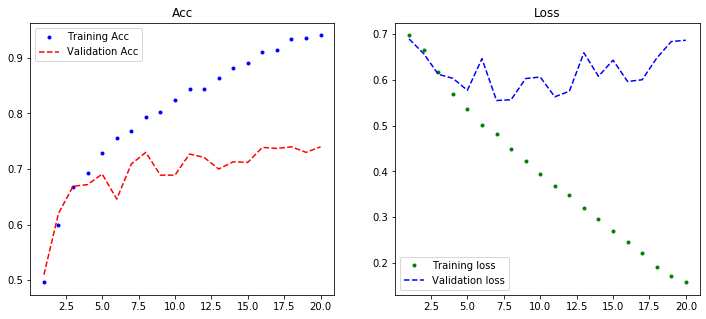

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
loss = history.history['loss']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.title("Acc")
plt.plot(epochs, acc, 'b.', label='Training Acc')
plt.plot(epochs, val_acc, 'r--', label='Validation Acc')
plt.legend()

plt.subplot(1,2,2)
plt.title("Loss")
plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b--', label='Validation loss')
plt.legend()

plt.show()

### Data Augmentation

In [19]:
datagen = ImageDataGenerator(rotation_range=40,        # 影像旋轉角度
                             width_shift_range=0.2,    # 水平平移
                             height_shift_range=0.2,   # 垂直平移
                             shear_range=0.2,          # 傾斜平移  
                             zoom_range=0.2,           # 隨機縮放大小
                             horizontal_flip=True,     # 隨機水平翻轉影像
                             fill_mode='nearest')      # 扭曲的影像要用甚麼方式填補, 有 nearest、reflect、wrap、constant 等四種方式

Choosed Image : C:\Users\azaz4\Desktop\Deep_Learning_using_keras\dataset\train\cats\cat.100.jpg

Original size:	(150, 150, 3)
Reshape size:	(1, 150, 150, 3)


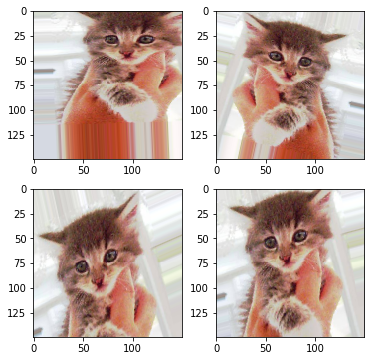

In [20]:
from keras.preprocessing import image

fnames = [ os.path.join(train_cat_dir, fname) for fname in os.listdir(train_cat_dir) ]

img_path = fnames[3]
print(f"Choosed Image : {img_path}\n")

img = image.load_img( img_path, target_size=(150, 150) )
x = image.img_to_array(img)
print(f"Original size:\t{x.shape}")
x = x.reshape( (1,)+x.shape )
print(f"Reshape size:\t{x.shape}")
      
i = 0
plt.figure(figsize=(6,6))
for batch in datagen.flow(x, batch_size=1):
    plt.subplot(2,2,i+1)
    imgplot = plt.imshow( image.array_to_img(batch[0]) )
    i+=1
    
    if i%4==0: break
plt.show()

### Using Data Augmentation in Model

In [21]:
model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [22]:
train_data_gen = ImageDataGenerator(rescale=1/255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_data_gen = ImageDataGenerator(rescale=1/255)

train_generator = train_data_gen.flow_from_directory(train_dir, 
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='binary')

validation_generator = test_data_gen.flow_from_directory(val_dir,
                                                         target_size=(150, 150),
                                                         batch_size=32,
                                                         class_mode='binary')

history = model.fit_generator(train_generator, 
                              steps_per_epoch=100,
                              epochs=20,
                              validation_data=validation_generator,
                              validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/20
100/100 [==============================] - 31s 307ms/step - loss: 0.6940 - acc: 0.5100 - val_loss: 0.6855 - val_acc: 0.5260
Epoch 2/20
100/100 [==============================] - 27s 265ms/step - loss: 0.6854 - acc: 0.5416 - val_loss: 0.6782 - val_acc: 0.5619
Epoch 3/20
100/100 [==============================] - 27s 267ms/step - loss: 0.6722 - acc: 0.5828 - val_loss: 0.6573 - val_acc: 0.6231
Epoch 4/20
100/100 [==============================] - 28s 282ms/step - loss: 0.6618 - acc: 0.6069 - val_loss: 0.6436 - val_acc: 0.6450
Epoch 5/20
100/100 [==============================] - 41s 406ms/step - loss: 0.6429 - acc: 0.6153 - val_loss: 0.6166 - val_acc: 0.6561
Epoch 6/20
100/100 [==============================] - 35s 354ms/step - loss: 0.6317 - acc: 0.6375 - val_loss: 0.6351 - val_acc: 0.6450
Epoch 7/20
100/100 [==============================] - 34s 340ms/step - loss: 0.6070 - acc: 0.6756 - val_lo

In [23]:
model.save('model/cats_dogs_classificator_small_data_Augmentation.h5')

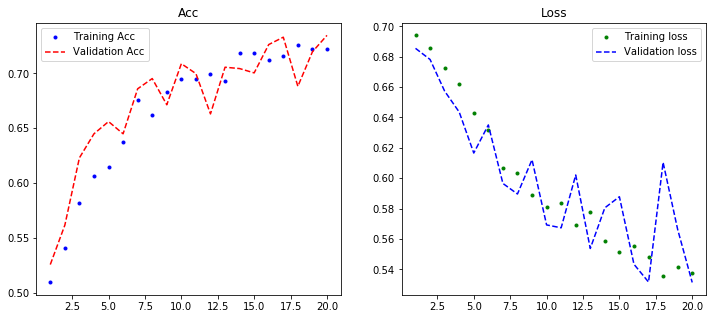

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
loss = history.history['loss']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.title("Acc")
plt.plot(epochs, acc, 'b.', label='Training Acc')
plt.plot(epochs, val_acc, 'r--', label='Validation Acc')
plt.legend()

plt.subplot(1,2,2)
plt.title("Loss")
plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b--', label='Validation loss')
plt.legend()

plt.show()

## **使用 Pretrained model**

通常 pretrained model 都是經過大量資料進行大規模訓練好的 model, 因此我們可以把它想成在 Computer vision 中的通則。

所以當今天我們資料量少時, 我們可以借用這些 pretrained model 的能力, 來幫助我們學習路徑可以更短一點。

最知名的 pretrained model 就非 ImageNet 莫屬，Keras.application 就有很多 pretrained model 拿來做使用。

使用 pretrained model 做訓練還有一些 mega, 這邊以簡單的兩種方法來做說明:
* feature extraction
* fine-tuning 

### Feature Extraction 

簡單來說, 就是將 pretrained model 的分類器給拔掉, Convolutional based 留著, 並接上我們設計的分類器。

這是為什麼呢? 因為 分類器 只適用於 model 它自己所進行的分類, 今天拿去做其他分類可能就不適用了。

而我們留著的 Convolutional based 的部分哪些是要保留, 哪些是要捨棄的呢?

這就取決於你想解決的問題是甚麼了, 通常越上層的 layer 是可以保留的, 

因為它通常都是處理一些高度通用的特徵, 如顏色、形狀、邊緣等，

越底層的 layer 則是越抽象的特徵如貓耳朵、老鼠尾巴這些不太通用的小細節。

#### Convolutional based from VGG16 - Imagenet 

In [25]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

In [26]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

現在 Convolutional based 有了, 那我們要將它和我們的 分類器 串接在一起，那有兩種方法:
* 沒有 Data Augmentation 版 (運算成本低,因沒有 data augmentation, 但很容易一開始就會有 Overfitting 發生)
* 可以 Data Augmentation 版 (運算成本高, 建議用好點的 GPU 跑, 反正 Colab 免費 \\(=W=)/ ) 

沒有 Data Augmentation 版是分兩步進行
1. 先將我們的 data 用 Convolutional based 來 predicted, 並把這些成果存成 np.array 作為下階段的 input data
2. 將剛剛產生完的 np.array 作為 input, 拿來訓練我們建好的 分類器 model

但我這邊直接使用 Data Augmentation 版的, 也就是直接把 Convolutional based 和 分類器 直接給接起來

In [27]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [28]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_4 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


**freeze** : 凍結更新原本 pretrained model 的權重, 因為你下面 分類器 的 weight 是 random 的, 在更新權重時很容易把我們 pretrained model 訓練好的權重給破壞掉

In [29]:
print('Before --- Trainable weights : {}'.format(len(model.trainable_weights)))
conv_base.trainable=False
print('After --- Trainable weights : {}'.format(len(model.trainable_weights)))

Before --- Trainable weights : 30
After --- Trainable weights : 4


In [30]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_4 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


#### Start to training 

In [31]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_data_gen = ImageDataGenerator(
    rescale=1/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_data_gen = ImageDataGenerator(rescale=1/255)

train_generator = train_data_gen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_data_gen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(train_generator, 
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 46s 462ms/step - loss: 0.5947 - acc: 0.6960 - val_loss: 0.4541 - val_acc: 0.8270
Epoch 2/30
100/100 [==============================] - 44s 445ms/step - loss: 0.4923 - acc: 0.7775 - val_loss: 0.3755 - val_acc: 0.8460
Epoch 3/30
100/100 [==============================] - 46s 461ms/step - loss: 0.4324 - acc: 0.8035 - val_loss: 0.3331 - val_acc: 0.8620
Epoch 4/30
100/100 [==============================] - 48s 476ms/step - loss: 0.4106 - acc: 0.8245 - val_loss: 0.3178 - val_acc: 0.8640
Epoch 5/30
100/100 [==============================] - 48s 483ms/step - loss: 0.3809 - acc: 0.8305 - val_loss: 0.2953 - val_acc: 0.8810
Epoch 6/30
100/100 [==============================] - 49s 491ms/step - loss: 0.3718 - acc: 0.8340 - val_loss: 0.2901 - val_acc: 0.8770
Epoch 7/30
100/100 [==============================] - 49s 493ms/step - loss: 0.3588 - acc: 0.8575 - val_lo

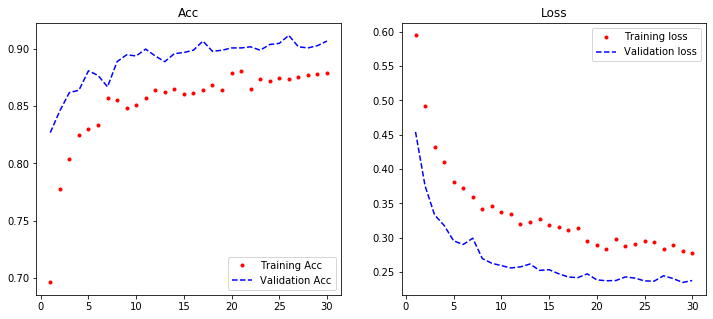

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
loss = history.history['loss']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.title("Acc")
plt.plot(epochs, acc, 'r.', label='Training Acc')
plt.plot(epochs, val_acc, 'b--', label='Validation Acc')
plt.legend()

plt.subplot(1,2,2)
plt.title("Loss")
plt.plot(epochs, loss, 'r.', label='Training loss')
plt.plot(epochs, val_loss, 'b--', label='Validation loss')
plt.legend()

plt.show()

### Fine tuninig 

所謂的 fine tuning 就是把部分 freeze 的地方給解凍，那實際的流程必須按照以下進行:
1. 把我們自己定義的 model 接在 pretrained model 的後面
2. 凍結 pretrained model 的 Convolutional based
3. 開始訓練我們的 model 
4. 將部分地方給解凍
5. 再共同訓練整個 model

第 3 步之前都是我們做過的, 現在進行 4, 5 步

通常我們解凍都是先從越接近底下的 layer 開始進行, 原因正如我們之前談過它是處理特定特徵的 layer

另外之所以不大量解凍的原因是 解凍太多, 參數就會增多, 那就更容易 over fitting

#### 部分解凍的寫法 

In [33]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [34]:
conv_base.trainable = True
set_trainable = False

for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

部分解凍後的 training, 記得 training rate 要設小一點, 這是因為要避免我們解凍的這 3 層會太過於影響我們整體的 model

In [36]:
# 編譯模型
model.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(lr=1e-5),  # training rate 我們設小一點
    metrics=['acc'])

# 訓練模型
history = model.fit_generator(   
    train_generator,
    steps_per_epoch=100,
    epochs = 10,
#     epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/10
100/100 [==============================] - 53s 531ms/step - loss: 0.2959 - acc: 0.8675 - val_loss: 0.2071 - val_acc: 0.9140
Epoch 2/10
100/100 [==============================] - 55s 554ms/step - loss: 0.2761 - acc: 0.8750 - val_loss: 0.3107 - val_acc: 0.8710
Epoch 3/10
100/100 [==============================] - 58s 584ms/step - loss: 0.2361 - acc: 0.9065 - val_loss: 0.2151 - val_acc: 0.9140
Epoch 4/10
100/100 [==============================] - 56s 558ms/step - loss: 0.2120 - acc: 0.9155 - val_loss: 0.3077 - val_acc: 0.8770
Epoch 5/10
100/100 [==============================] - 56s 560ms/step - loss: 0.2250 - acc: 0.9110 - val_loss: 0.2140 - val_acc: 0.9200
Epoch 6/10
100/100 [==============================] - 56s 561ms/step - loss: 0.1932 - acc: 0.9275 - val_loss: 0.1956 - val_acc: 0.9200
Epoch 7/10
100/100 [==============================] - 56s 563ms/step - loss: 0.1712 - acc: 0.9295 - val_loss: 0.2429 - val_acc: 0.9160
Epoch 8/10
100/100 [==============================] - 5

秀出我們的 training evolution, 用指數移動平均值曲線的方式呈現, 因為它的振幅很大

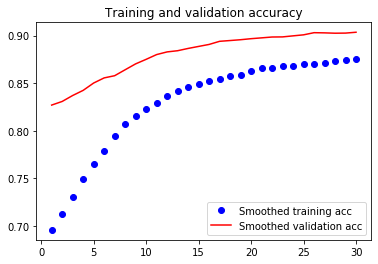

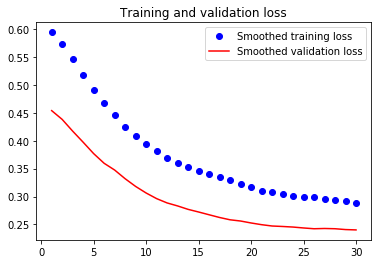

In [37]:
def smooth_curve(points, factor=0.8):
	smoothed_points = []
	for point in points:
		if smoothed_points:
			previous = smoothed_points[-1]
			smoothed_points.append(previous * factor + point * (1 - factor))
		else:
			smoothed_points.append(point)
	return smoothed_points

plt.plot( epochs,
	   smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot( epochs,
	   smooth_curve(val_acc), 'r', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot( epochs,
	   smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot( epochs,
	   smooth_curve(val_loss), 'r', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

用 evaluate_generator 來看準確性

In [38]:
test_generator = test_data_gen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.
test acc: 0.9329999923706055


## **視覺化 CNN 的學習內容**

大家都說 model 是黑盒子, 很難以人類的方式去理解它的解讀原理,<br>
但對於 CNN 來說, 我們可以利用視覺化的方式來試圖解釋它的過程,<br>
有以下 3 種常用的視覺化方式來幫助我們解讀: 

* 視覺化中間層的輸出
* 視覺化 CNN 的 filter
* 用 heatmap 視覺化熱區

這邊先以第一種作練習

### **視覺化中間層的輸出**

這方法是在給定輸入影像的狀況下,
顯示出 Convnet 中各個 Conv Layer 及 Pooling Layer 的 feature maps。

1. 首先載入我們之前存好的 model

In [40]:
from keras.models import load_model

model = load_model('model/cats_dogs_classificator_small_data.h5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)       147584    
__________

2. 接下來取一張不受 Convnet 訓練過的圖片作為輸入

In [49]:
import os
from keras.preprocessing import image
import numpy as np

img_path = os.path.join(os.getcwd(),'dataset','test','cats', 'cat.1400.jpg')

img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255

print('Image tensor shape : {}'.format(img_tensor.shape))

Image tensor shape : (1, 150, 150, 3)


3. 顯示測試影像 

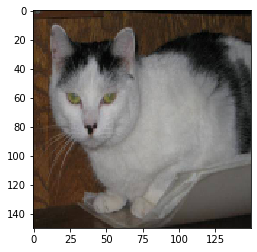

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(img_tensor[0])
plt.show()

3. 我們必須建立一個 Keras Model 來觀看我們的 Feature map
   將批量的影像作為 輸入，並將 Conv layer 及 Pooling layer 的結果為 輸出。
   我們必須使用名為 Model 的class來建立我們的 model，它和 Sequential Model 的不同處在於擁有多個輸出。
   
   在此之前，我們必須準備好
   * 一個輸入張量
   * 一個輸出張量list

In [56]:
from keras import models

# 這邊取前8層來使用
layer_ouput_list = [layer.output for layer in model.layers[:8]]
# 印出來看一下
for op in layer_ouput_list: print(op)
# 建立 model
activation_model = models.Model(inputs=model.input, outputs= layer_ouput_list)

Tensor("conv2d_4_1/Relu:0", shape=(?, 148, 148, 32), dtype=float32)
Tensor("max_pooling2d_3_1/MaxPool:0", shape=(?, 74, 74, 32), dtype=float32)
Tensor("conv2d_5_1/Relu:0", shape=(?, 72, 72, 64), dtype=float32)
Tensor("max_pooling2d_4_1/MaxPool:0", shape=(?, 36, 36, 64), dtype=float32)
Tensor("conv2d_6_1/Relu:0", shape=(?, 34, 34, 128), dtype=float32)
Tensor("max_pooling2d_5_1/MaxPool:0", shape=(?, 17, 17, 128), dtype=float32)
Tensor("conv2d_7_1/Relu:0", shape=(?, 15, 15, 128), dtype=float32)
Tensor("max_pooling2d_6_1/MaxPool:0", shape=(?, 7, 7, 128), dtype=float32)


4. 將我們之前準備好的圖片丟到這 Model 中看結果

In [59]:
activations = activation_model.predict(img_tensor)
print('The number of Total output layer : {}'.format(len(activations)))

The number of Total output layer : 8


Shape of the layer : (1, 148, 148, 32)


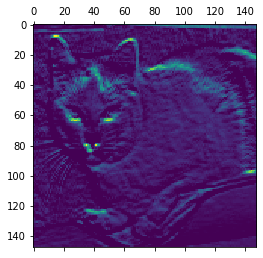

In [70]:
# 使用其中一層來看看效果
import matplotlib.pyplot as plt
%matplotlib inline

first_layer = activations[0]
print('Shape of the layer : {}'.format(first_layer.shape))

# 這邊用 matshow ，是為方便我們指定 cmap 來顯示， 
plt.matshow(first_layer[0, :, :, 5], cmap='viridis')

5. 把所有的 Layer 的 Output 給秀出來

C:\Users\azaz4\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


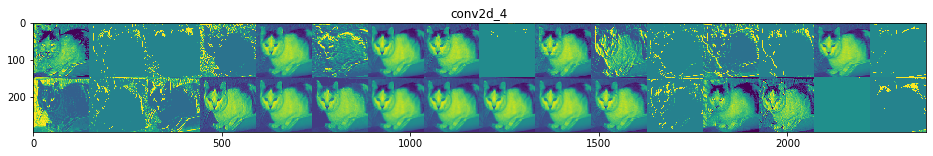

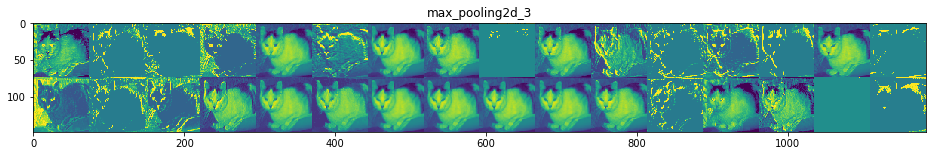

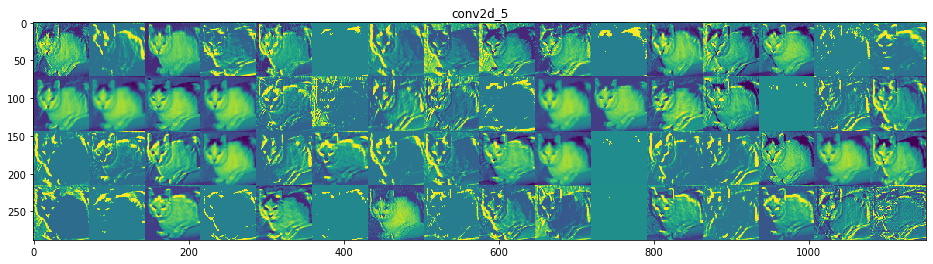

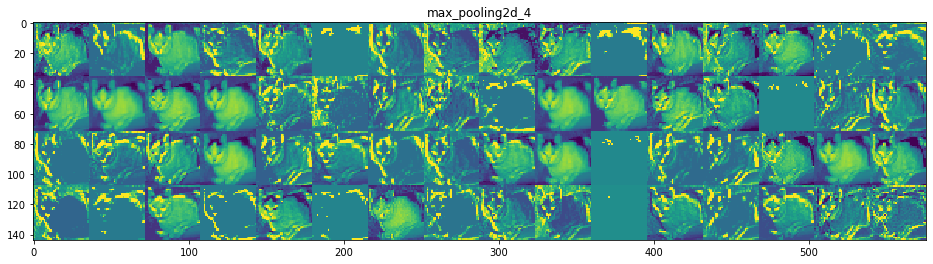

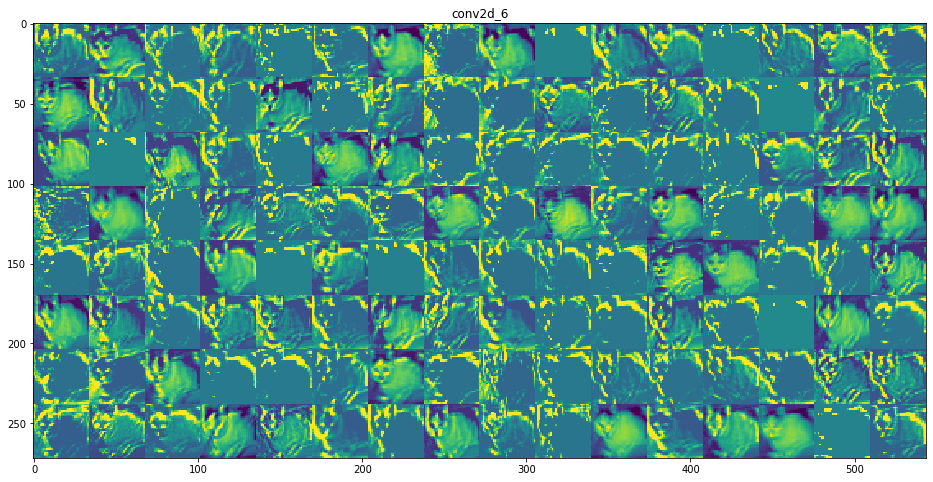

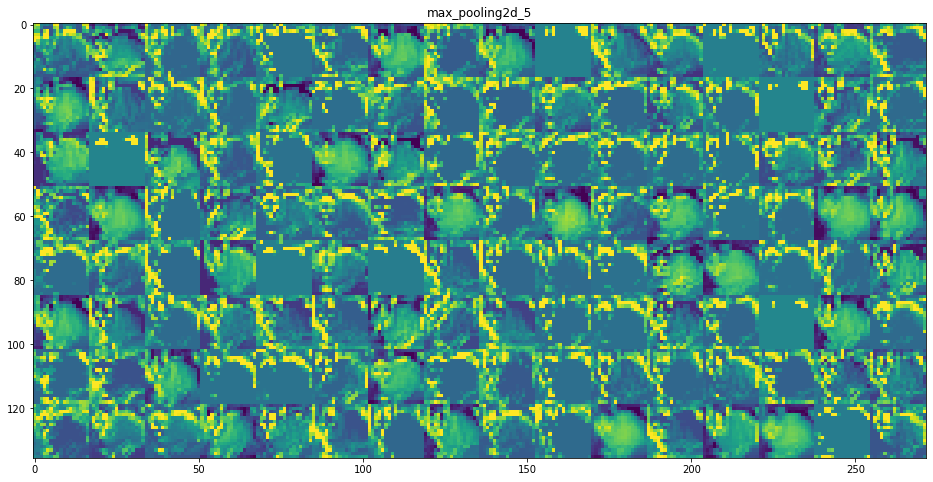

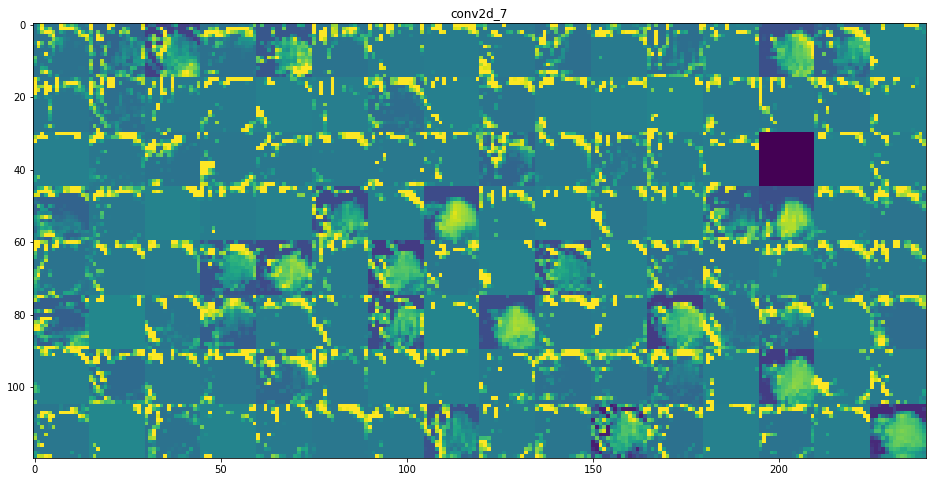

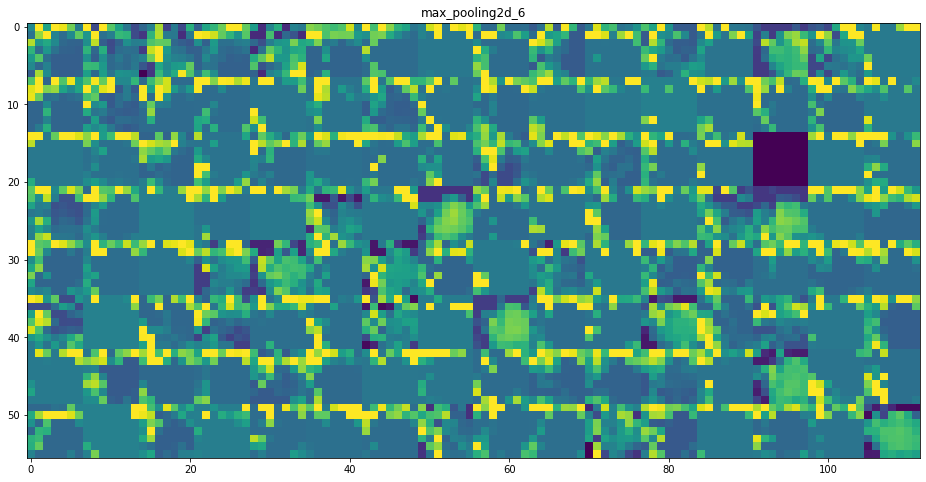

In [78]:
# 先定義我們 layer 的名稱
layer_names = [layer.name for layer in model.layers]

# 定義我們圖一層要輸出幾張
images_per_row= 16

# 開始畫圖
for layer_name, layer_activation in zip(layer_names, activations):
    num_of_features = layer_activation.shape[-1]  # 有幾張 feature maps
    size_of_features = layer_activation.shape[1]  # 每張 feature map 多大
    
    num_of_cols = num_of_features // images_per_row # 需要多少橫列來
    display_grid = np.zeros( (size_of_features*num_of_cols, images_per_row*size_of_features) ) # 建立畫布
    
    for col in range(num_of_cols):
        for row in range(images_per_row):
            # 選擇我們要的 channel，並對它再做一些修飾
            channel_image = layer_activation[0, :, :, col*images_per_row + row]
            channel_image = ( (channel_image-channel_image.mean())/channel_image.std() ) # 標準化
            channel_image = channel_image*64 + 128  # 將標準化的範圍擴大
            channel_image = np.clip( channel_image, 0, 255 ).astype('uint8')  # 用來切我們的數值範圍，切在 0~255
            # 處理完之後存進畫布，取代原先的 zero
            display_grid[ col*size_of_features : (col+1)*size_of_features,
                          row*size_of_features : (row+1)*size_of_features] = channel_image
            
    scale = 1/size_of_features  # 縮減畫布尺寸，不然太大
    
    plt.figure( figsize=(scale*display_grid.shape[1], scale*display_grid.shape[0]) )
    plt.title(layer_name)
    plt.grid = False        # 是否要網格線
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )
    

我們可以看到有幾個特點
* 第一層大多是針對邊緣的特徵，所以這階段的影像和原本 input 差沒多少
* 隨層數增加，輸出就越是抽象，視覺上我們也很難解釋
* 隨層數增加，輸出就越是稀疏，這是因為一開始 filter 裡面都有值，因為有很多特徵，
  然而越到下層，filter 就開始有 空值，因為已經有點找不到輸入影像的特徵了